In [40]:
import crypy as cp
import matplotlib.pyplot as plt
import numpy as np
import importlib
importlib.reload(cp)

<module 'crypy' from 'd:\\github\\2H_TaSe2_Tc_STM\\crypy.py'>

Test

In [41]:
import math
import numpy as np
import matplotlib.pyplot as plt
def gen_directional_line(xx,yy,c,n=10,sharpness=1,biasness=0):
    p12 = np.array((xx,yy))
    p1 = p12[:,0]
    p2 = p12[:,1]
    print(p1,p2,type(p1))
    def get_perpendicular_unit_vector(v):
        """
        주어진 2D 벡터(v)에 수직인 단위 벡터를 반환합니다.
        v는 (x, y) 형태의 튜플이나 리스트일 수 있습니다.
        
        벡터 (x, y)에 대해 90도 반시계 방향으로 회전한
        수직 벡터 (-y, x)를 기반으로 단위 벡터를 계산합니다.
        """
        x, y = v
        
        # 벡터의 크기(magnitude) 계산
        magnitude = math.sqrt(x**2 + y**2)
        
        # 0 벡터 (Zero vector) 예외 처리
        if magnitude == 0:
            return (0.0, 0.0)
        
        # 수직 벡터 (-y, x)
        perp_x = -y
        perp_y = x
        
        # 수직 벡터를 정규화(normalize)하여 단위 벡터로 만듦
        unit_perp_x = perp_x / magnitude
        unit_perp_y = perp_y / magnitude
        
        return np.array((unit_perp_x, unit_perp_y))
    p1 = np.array(p1)
    p2 = np.array(p2)
    #-------------------------------------------

    d = p2-p1
    print(d)
    d_norm = np.linalg.norm(d)
    d_neck_norm = (1/(2*(3**.5)))*(d_norm/n)

    d_neck = sharpness*d_neck_norm*get_perpendicular_unit_vector(d)
    print(d_neck*d)
    # for i_n in range(n):
    p_neck1 = p1-d_neck
    v_from_p_neck1_to_p_neck2 = d/n
    v_from_p_neck1_to_p_nose = 0.5*(d/n)+3*d_neck
    print(v_from_p_neck1_to_p_neck2,v_from_p_neck1_to_p_nose)
    p_neck2 = p_neck1 + v_from_p_neck1_to_p_neck2
    p_nose = p_neck1 + v_from_p_neck1_to_p_nose
    p_tri = np.array((p_neck1,p_neck2,p_nose)) + d_neck*biasness
    for i_n in range(n):
        p_tri_now = p_tri + (d/n)*i_n
        plt.fill(p_tri_now[:,0],p_tri_now[:,1],c=c)


Previous

In [42]:
from imagingPhase import visPhase as vp
clrs = vp.DomainColoring._set_defualt_clrset()
CLR_FACE = clrs
CLR_EDGE = np.eye(3)
CLR_NODE = np.array([(255, 165, 0),(0, 127, 255)])/256

[-4.         -4.61880215] [-4.         -4.04145188] <class 'numpy.ndarray'>
[0.         0.57735027]
[-0.  0.]
[0.         0.11547005] [-0.1         0.05773503]
[-4.5        -3.75277675] [-4.5        -3.17542648] <class 'numpy.ndarray'>
[0.         0.57735027]
[-0.  0.]
[0.         0.11547005] [-0.1         0.05773503]
[-3.         -4.61880215] [-3.         -4.04145188] <class 'numpy.ndarray'>
[0.         0.57735027]
[-0.  0.]
[0.         0.11547005] [-0.1         0.05773503]
[-3.5        -3.75277675] [-3.5        -3.17542648] <class 'numpy.ndarray'>
[0.         0.57735027]
[-0.  0.]
[0.         0.11547005] [-0.1         0.05773503]
[-4.         -2.88675135] [-4.         -2.30940108] <class 'numpy.ndarray'>
[0.         0.57735027]
[-0.  0.]
[0.         0.11547005] [-0.1         0.05773503]
[-4.5        -2.02072594] [-4.5        -1.44337567] <class 'numpy.ndarray'>
[0.         0.57735027]
[-0.  0.]
[0.         0.11547005] [-0.1         0.05773503]
[-2.         -4.61880215] [-2.         -

(-2.0, 2.0)

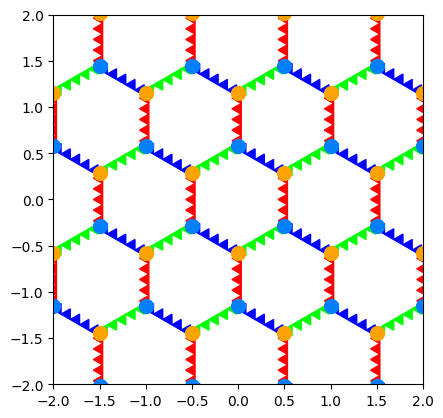

In [43]:
a1 = [1,0]
a2 = [-0.5,3**0.5/2]
pv_dwdv = cp.PrimitiveVector2D(a1,a2)
pv_dwdv_sub = pv_dwdv.get_sub_structure(3,3) # unitcell 안에서 새부적인 작업을 하기 위해 # unitcell 안에서 새부적인 작업을 하기 위해
pv_domain = pv_dwdv.get_super_structure(3,3)


bss_dwdv = cp.Basis2D(pv_dwdv_sub)

gen_vor = lambda x,y,c : plt.plot(x,y,color=c,marker='o',linestyle='None',markersize=10)
gen_vor_A = lambda x,y: gen_vor(x,y,CLR_NODE[0,:])
gen_vor_C = lambda x,y: gen_vor(x,y,CLR_NODE[1,:])
gen_wall = lambda xx,yy,c: gen_directional_line(xx,yy,c=c,n=5,sharpness=1,biasness=0)
gen_wall_r = lambda xx,yy: gen_wall(xx,yy,CLR_EDGE[0,:])
gen_wall_g = lambda xx,yy: gen_wall(xx,yy,CLR_EDGE[1,:])
gen_wall_b = lambda xx,yy: gen_wall(xx,yy,CLR_EDGE[2,:])

p1=(2,1)# vorA
p2=(1,2)# vorC
p3=(1,-1)
p4=(-1,1)

bss_dwdv.add_artist(gen_wall_r,(p3,p1),label='wall_r')
bss_dwdv.add_artist(gen_wall_g,(p2,p4),label='wall_g')
bss_dwdv.add_artist(gen_wall_b,(p2,p1),label='wall_b')
bss_dwdv.add_artist(gen_vor_A,(p1),label='vor_A')
bss_dwdv.add_artist(gen_vor_C,(p2),label='vor_C')

bss_domain = cp.Basis2D(pv_dwdv_sub) # to draw face
gen_hex = lambda x,y,c: cp.Collection.Generator.gen_hexagon(x=x,y=y,c=c,phi=np.pi/2,r=1/3**.5)
def gen_hex_all(x,y,cla_all):
    for i in range(3):
        for j in range(3):
            x_cntr,y_cntr = pv_dwdv.cal_xy_from_ij([i,j]).flatten()
            print(x_cntr,y_cntr)
            gen_hex_one = lambda x,y: gen_hex(x+x_cntr,y+y_cntr,cla_all[i,j,:])
            gen_hex_one(x,y)
phase_3x3 = lambda x,y :gen_hex_all(x,y,CLR_FACE)
bss_domain.add_artist(phase_3x3,(0,0),label='hexagons')

xylim = ((-5,5),(-5,5))
lp_dwdv = cp.LatticePoints2D(pv_dwdv) 
lp_dwdv.generate_points_by_xylim(*xylim)
lp_domain = cp.LatticePoints2D(pv_domain) 
lp_domain.generate_points_by_xylim(*xylim)


cry_dw_dv = cp.Crystal2D(bss_dwdv,lp_dwdv)
cry_domain = cp.Crystal2D(bss_domain,lp_domain)
# cry_domain.plot_crystal()
fig,ax = cry_dw_dv.plot_crystal()    
ax.set_xlim(-2,2)
ax.set_ylim(-2,2) 







In [44]:
(2*(3**.5))

3.4641016151377544

In [45]:
%matplotlib inline
bss_domain_H = cp.Basis2D(pv_dwdv) # to draw face
bss_domain_H.add_artist(gen_vor_A,(2/3,1/3),label='vor_A')
bss_domain_H.add_artist(gen_vor_C,(1/3,2/3),label='vor_C')

bss_domain_HA = cp.Basis2D(pv_dwdv) # to draw face
gen_domain_A = lambda x,y: cp.Collection.Generator.gen_regular_polygon(n=3,
            phi=-np.pi/2,x=x,y=y,r=1/3**.5,c=CLR_NODE[0,:])
bss_domain_HA.add_artist(gen_domain_A,(2/3,1/3),label='domain_A')
bss_domain_HA.add_artist(gen_vor_C,(1/3,2/3),label='vor_C')

bss_domain_HAC = cp.Basis2D(pv_dwdv) # to draw face
bss_domain_HAC.add_artist(gen_domain_A,(2/3,1/3),label='domain_A')
gen_domain_C = lambda x,y: cp.Collection.Generator.gen_regular_polygon(n=6,
    phi=0,x=x,y=y,r=1/3,c=CLR_NODE[1,:])                                                                       
bss_domain_HAC.add_artist(gen_domain_A,(2/3,1/3),label='domain_A')
bss_domain_HAC.add_artist(gen_domain_C,(1/3,2/3),label='domain_C')
# 

cry_H = cp.Crystal2D(bss_domain_H,lp_dwdv)
cry_HA = cp.Crystal2D(bss_domain_HA,lp_dwdv)
cry_HAC = cp.Crystal2D(bss_domain_HAC,lp_dwdv)
crys = [cry_H,cry_HA,cry_HAC]

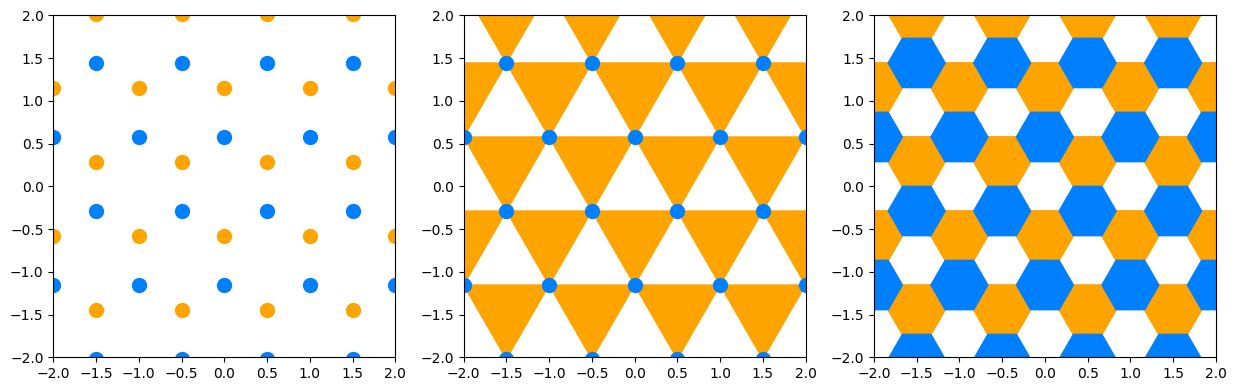

In [46]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
for ax,cry in zip(axs,crys):
    plt.sca(ax)
    cry.plot_crystal()
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def draw_atom(ax, x, y, radius=0.4, color_hex='#4169E1'):
    """
    그래데이션 효과가 적용된 단일 원자를 그리는 함수입니다. (수정 없음)
    """
    for i in range(10):
        factor = i / 10.0
        r_base = int(color_hex[1:3], 16) / 255.0
        g_base = int(color_hex[3:5], 16) / 255.0
        b_base = int(color_hex[5:7], 16) / 255.0
        r = r_base * (1 - factor) + factor * 0.8
        g = g_base * (1 - factor) + factor * 0.8
        b = b_base * (1 - factor) + factor * 0.8
        r, g, b = max(0, min(r, 1)), max(0, min(g, 1)), max(0, min(b, 1))
        circle = plt.Circle((x, y), radius * (1 - factor * 0.5), color=(r, g, b), zorder=10)
        ax.add_artist(circle)
    highlight = plt.Circle((x - radius * 0.2, y + radius * 0.2), radius * 0.2, color='white', alpha=0.5, zorder=11)
    ax.add_artist(highlight)

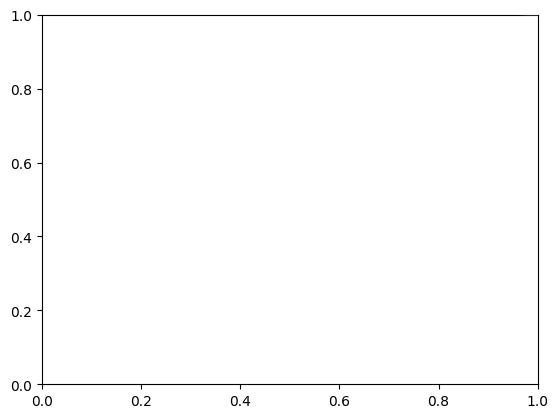

In [48]:
ax = plt.gca()
draw_atom(ax,1, 2, radius=1, color_hex='#4169E1')

In [49]:
def draw_atom(x, y, radius=0.4, color_hex='#4169E1'):
    """
    그래데이션 효과가 적용된 단일 원자를 그리는 함수입니다. (수정 없음)
    """
    ax = plt.gca()
    for i in range(10):
        factor = i / 10.0
        r_base = int(color_hex[1:3], 16) / 255.0
        g_base = int(color_hex[3:5], 16) / 255.0
        b_base = int(color_hex[5:7], 16) / 255.0
        r = r_base * (1 - factor) + factor * 0.8
        g = g_base * (1 - factor) + factor * 0.8
        b = b_base * (1 - factor) + factor * 0.8
        r, g, b = max(0, min(r, 1)), max(0, min(g, 1)), max(0, min(b, 1))
        circle = plt.Circle((x, y), radius * (1 - factor * 0.5), color=(r, g, b), zorder=10)
        ax.add_artist(circle)
    highlight = plt.Circle((x - radius * 0.2, y + radius * 0.2), radius * 0.2, color='white', alpha=0.5, zorder=11)
    ax.add_artist(highlight)

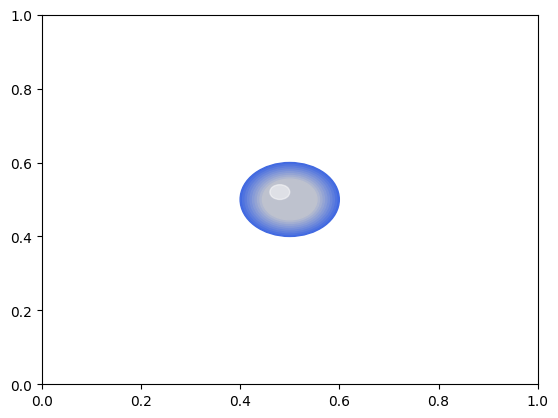

In [50]:
draw_atom(0.5,0.5, radius=0.1, color_hex='#4169E1')

In [51]:
plt.Circle((3,3))

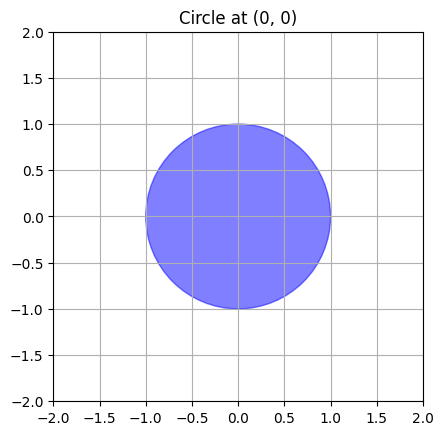

In [52]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_circle(x, y, radius=1.0, color='blue', alpha=0.5):
    """
    지정된 (x, y) 좌표를 중심으로 하는 원을 그립니다.
    
    Parameters:
    x (float): 원의 중심 x 좌표
    y (float): 원의 중심 y 좌표
    radius (float, optional): 원의 반지름. 기본값은 1.0입니다.
    color (str, optional): 원의 색상. 기본값은 'blue'입니다.
    alpha (float, optional): 원의 투명도 (0.0 ~ 1.0). 기본값은 0.5입니다.
    """
    
    # 1. 그림(figure)과 축(axes) 객체 생성
    fig, ax = plt.subplots()

    # 2. Circle 객체 생성
    #    plt.Circle은 (x, y) 중심 좌표와 반지름을 인자로 받습니다.
    circle = patches.Circle((x, y), radius=radius, color=color, alpha=alpha)

    # 3. 축(axes)에 원(patch) 추가
    ax.add_patch(circle)

    # 4. 플롯 설정
    # 축의 가로/세로 비율을 동일하게 설정 (원이 타원으로 보이지 않게 함)
    ax.set_aspect('equal') 
    
    # 원이 잘 보이도록 축 범위 자동 설정 (약간의 여백 추가)
    ax.set_xlim(x - radius - 1, x + radius + 1)
    ax.set_ylim(y - radius - 1, y + radius + 1)
    
    # 그리드 및 제목 추가
    ax.grid(True)
    ax.set_title(f"Circle at ({x}, {y})")

    # 5. 플롯 보여주기
    plt.show()

# --- 함수 사용 예시 ---

# 예시 1: (0, 0)에 반지름 1인 원 그리기
draw_circle(0, 0)

# 예시 2: (5, 3)에 반지름 2.5인 붉은색 원 그리기
# draw_circle(5, 3, radius=2.5, color='red', alpha=0.8)

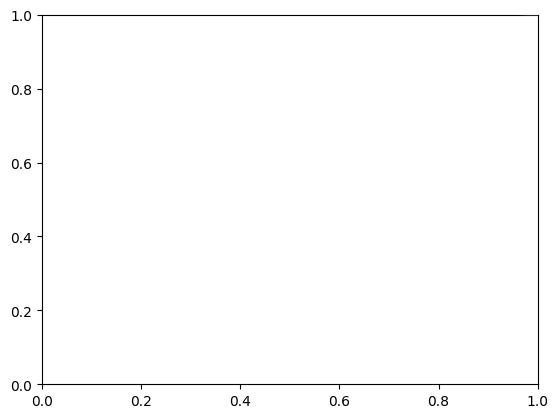

In [53]:

draw_atom(1, 2, radius=1, color_hex='#4169E1')

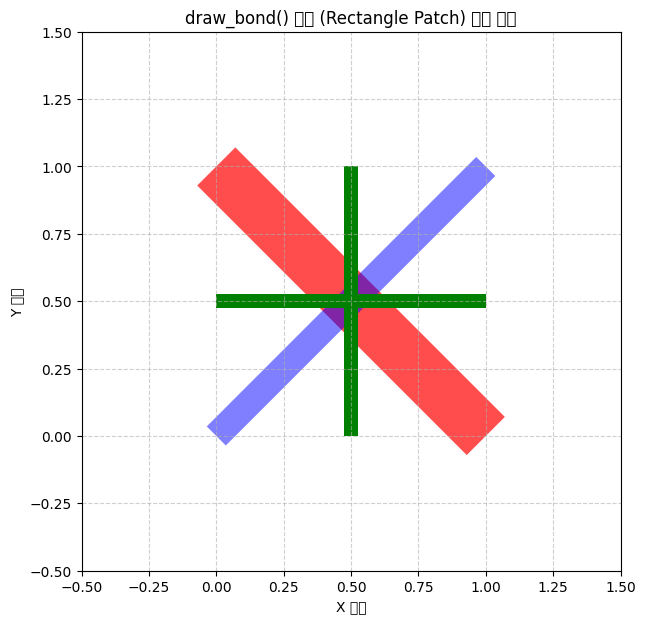

In [65]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches  # patches 모듈을 임포트
import numpy as np

def draw_bond(x, y, r, **kwargs):
    """
    matplotlib.patches.Rectangle을 사용하여 두 점 (x1, y1)과 (x2, y2) 사이에
    데이터 좌표 기준 폭 r을 가진 사각형(bond)을 그립니다.

    매개변수:
    x (list-like): (x1, x2) 형태의 x좌표 시퀀스
    y (list-like): (y1, y2) 형태의 y좌표 시퀀스
    r (float):     사각형의 폭 (데이터 좌표 기준)
    **kwargs:      Rectangle 패치에 전달할 추가 스타일 인자 
                   (예: facecolor='blue', alpha=0.5 등)
    """
    
    # 1. 현재 축(axes) 가져오기
    # 함수 외부에서 `ax = plt.subplot()` 등으로 축을 미리 만들어 두는 것이 좋습니다.
    # 여기서는 편의상 plt.gca() (Get Current Axes)를 사용합니다.
    ax = plt.gca()

    # 2. 좌표 및 벡터 계산
    x1, x2 = x
    y1, y2 = y
    
    dx = x2 - x1
    dy = y2 - y1

    # 3. 본드 길이(length) 및 각도(angle) 계산
    # np.hypot은 sqrt(dx**2 + dy**2) 보다 수치적으로 안정적입니다.
    length = np.hypot(dx, dy) 
    
    # 0 길이의 본드는 그리지 않음 (오류 방지)
    if length == 0:
        return

    # x축 양의 방향 기준 반시계 방향 각도 (라디안)
    angle_rad = np.arctan2(dy, dx)
    # matplotlib patch는 '도' (degree) 단위를 사용
    angle_deg = np.degrees(angle_rad) 

    # 4. 사각형의 앵커(anchor) 위치 계산
    # Rectangle은 (x, y) 앵커를 '회전 전' 좌하단 모서리로 하여 angle만큼 회전합니다.
    # (x1, y1)에서 (x2, y2) 라인을 중심으로 하려면,
    # 앵커를 (x1, y1)에서 선의 수직 방향으로 -r/2 만큼 이동시켜야 합니다.
    
    # (x1, y1) 기준, 수직(반시계 90도) 방향 단위 벡터: (-dy/length, dx/length)
    # 우리가 필요한 이동 방향 (-r/2, 즉 시계방향 90도): (dy/length, -dx/length)
    
    shift_x = (dy / length) * (r / 2)
    shift_y = (-dx / length) * (r / 2)
    
    anchor_x = x1 + shift_x
    anchor_y = y1 + shift_y

    # 5. 스타일(kwargs) 설정
    # 'facecolor'가 제공되지 않으면 'black'을 기본값으로 사용
    if 'facecolor' not in kwargs:
        kwargs['facecolor'] = 'black'
    # 'edgecolor'를 없애면 경계선이 사라져 더 깔끔해 보일 수 있습니다.
    if 'edgecolor' not in kwargs:
        kwargs['edgecolor'] = 'none' # 또는 kwargs['facecolor']

    # 6. Rectangle 패치 생성
    rect = patches.Rectangle(
        (anchor_x, anchor_y),   # (x, y) 앵커 (회전 전 좌하단)
        length,                 # width (본드 길이)
        r,                      # height (본드 폭)
        angle=angle_deg,        # 회전 각도 (도)
        **kwargs                # 스타일 인자 적용 (facecolor, alpha 등)
    )

    # 7. 현재 축(ax)에 패치 추가
    ax.add_patch(rect)

# --- 사용 예시 ---

# 1. 그림(figure)과 축(axes) 생성
fig, ax = plt.subplots(figsize=(7, 7)) # 명시적으로 fig, ax를 생성

# 2. 함수를 호출하여 여러 개의 본드 그리기
# (0, 0) -> (1, 1) | 폭 0.1
draw_bond((0, 1), (0, 1), r=0.1, facecolor='blue', alpha=0.5, zorder=1)

# (0, 1) -> (1, 0) | 폭 0.2
draw_bond((0, 1), (1, 0), r=0.2, facecolor='red', alpha=0.7, zorder=0)

# (0.5, 0) -> (0.5, 1) | 폭 0.05
draw_bond((0.5, 0.5), (0, 1), r=0.05, facecolor='green')

# (0, 0.5) -> (1, 0.5) | 폭 0.05
draw_bond((0, 1), (0.5, 0.5), r=0.05, facecolor='green')


# 3. 보기 좋게 축 범위 및 비율 설정
ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

# set_aspect('equal')은 x축과 y축의 스케일을 동일하게 맞춥니다.
# patch를 사용할 때는 이 설정이 매우 중요합니다.
ax.set_aspect('equal', adjustable='box') 

# 4. 제목 및 레이블 추가
ax.set_title("draw_bond() 함수 (Rectangle Patch) 사용 예시")
ax.set_xlabel("X 좌표")
ax.set_ylabel("Y 좌표")
ax.grid(True, linestyle='--', alpha=0.6)

# 5. 플롯 보여주기
plt.show()

In [54]:
color1='#4682B4'
radius1=0.35
color2='#FF6347'
radius2=0.25

In [71]:
def draw_bond(x, y, r, main_color='dimgray', highlight_color='lightgray', shadow_color='gray', **kwargs):
    """
    matplotlib.patches.Rectangle과 Ellipse를 사용하여 두 점 (x1, y1)과 (x2, y2) 사이에
    데이터 좌표 기준 폭 r을 가진 본드를 3D 실린더처럼 그립니다.

    매개변수:
    x (list-like): (x1, x2) 형태의 x좌표 시퀀스
    y (list-like): (y1, y2) 형태의 y좌표 시퀀스
    r (float):     사각형의 폭 (데이터 좌표 기준)
    main_color (str): 실린더의 주 색상
    highlight_color (str): 실린더의 하이라이트/끝 부분 색상
    shadow_color (str): 실린더의 그림자/끝 부분 색상 (다른 쪽)
    **kwargs:      Rectangle 및 Ellipse 패치에 전달할 추가 스타일 인자 
                   (예: alpha=0.8, zorder 등)
    """
    ax = plt.gca()

    x1, x2 = x
    y1, y2 = y
    
    dx = x2 - x1
    dy = y2 - y1

    length = np.hypot(dx, dy) 
    if length == 0:
        return

    angle_rad = np.arctan2(dy, dx)
    angle_deg = np.degrees(angle_rad) 

    # --- 1. 실린더의 메인 몸통 (Rectangle) ---
    
    # 앵커 계산 (선분을 중심으로 정렬)
    shift_x_rect = (dy / length) * (r / 2)
    shift_y_rect = (-dx / length) * (r / 2)
    anchor_x_rect = x1 + shift_x_rect
    anchor_y_rect = y1 + shift_y_rect

    # Rectangle 패치 생성 (주 색상 사용)
    rect = patches.Rectangle(
        (anchor_x_rect, anchor_y_rect),
        length,
        r,
        angle=angle_deg,
        facecolor=main_color,
        edgecolor='none', # 경계선 없음
        zorder=kwargs.get('zorder', 1), # 기본 zorder
        alpha=kwargs.get('alpha', 1.0) # 기본 투명도
    )
    ax.add_patch(rect)

    # --- 2. 실린더의 양쪽 끝 부분 (Ellipse) ---

    # Ellipse의 크기: 폭 r, 높이 r/2 (원근감으로 납작해진 원처럼 보이게)
    ellipse_width = r
    ellipse_height = r / 2.5 # 원근감을 위해 높이를 줄임. 조절 가능.

    # Ellipse의 회전 각도: 본드와 동일한 각도로 회전
    # 하지만 Ellipse는 x축과 평행하게 누워있는 것을 기준으로 회전하므로,
    # 본드의 각도 그대로 적용 (ellipse_angle=본드각도)
    ellipse_angle_deg = angle_deg

    # 첫 번째 끝 (x1, y1)
    # Ellipse의 중심은 (x1, y1)
    # 앵커가 아닌 중심을 기준으로 하는 patches.Ellipse를 사용
    ellipse1 = patches.Ellipse(
        (x1, y1), 
        width=ellipse_width, 
        height=ellipse_height,
        angle=ellipse_angle_deg,
        facecolor=highlight_color, # 밝은 색상으로 하이라이트 효과
        edgecolor='none',
        zorder=kwargs.get('zorder', 1) + 0.5, # 본드 몸통보다 살짝 위에
        alpha=kwargs.get('alpha', 1.0)
    )
    ax.add_patch(ellipse1)

    # 두 번째 끝 (x2, y2)
    ellipse2 = patches.Ellipse(
        (x2, y2),
        width=ellipse_width,
        height=ellipse_height,
        angle=ellipse_angle_deg,
        facecolor=shadow_color, # 어두운 색상으로 그림자 효과
        edgecolor='none',
        zorder=kwargs.get('zorder', 1) + 0.5, # 본드 몸통보다 살짝 위에
        alpha=kwargs.get('alpha', 1.0)
    )
    ax.add_patch(ellipse2)

In [55]:
a1 = [1,0]
a2 = [-0.5,3**0.5/2]

(-2.0, 2.0)

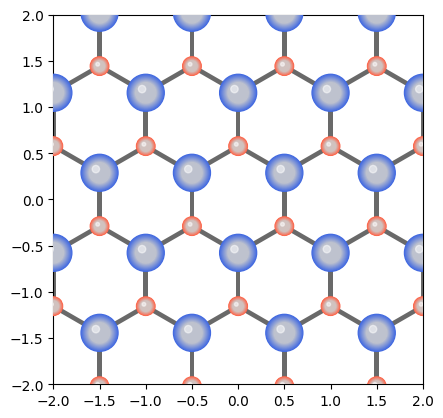

In [75]:
a1 = [1,0]
a2 = [-0.5,3**0.5/2]
pv = cp.PrimitiveVector2D(a1,a2)
bss = cp.Basis2D(pv)
gen_atom_Ta = lambda x,y: draw_atom(x, y, radius=0.2, color_hex='#4169E1')
gen_atom_Se = lambda x,y: draw_atom(x, y, radius=0.1, color_hex='#FF6347')
gen_bond = lambda x,y: draw_bond(x,y,r=.05,facecolor=(.7,.7,.7))
p1 = np.array((2,1))/3
p2 = np.array((1,2))/3
p3=np.array((1,-1))/3 
p4=-p3
bss.add_artist(gen_atom_Ta,(p1),label='Ta')
bss.add_artist(gen_atom_Se,(p2),label='Se')
bss.add_artist(gen_bond,(p1,p2),label = 'bond1')
bss.add_artist(gen_bond,(p1,p3),label = 'bond2')
bss.add_artist(gen_bond,(p2,p4),label = 'bond3')
xylim = ((-5,5),(-5,5))
lp = cp.LatticePoints2D(pv) 
lp.generate_points_by_xylim(*xylim)
cry = cp.Crystal2D(bss,lp)
fig,ax  = cry.plot_crystal()
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

In [76]:
from matplotlib.collections import PatchCollection

# ... (이전 답변의 PatchCollection 코드) ...
# 이 부분이 cmap을 사용하는 핵심입니다.
collection = PatchCollection(patches, cmap='viridis') 
# 데이터 값 (0~1)을 각 패치에 할당
collection.set_array(np.linspace(0, 1, N)) 
ax.add_collection(collection)

TypeError: 'module' object is not iterable

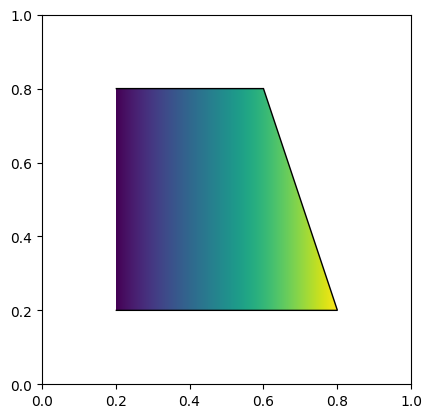

In [79]:
from matplotlib.patches import PathPatch
from matplotlib.path import Path

fig, ax = plt.subplots()
verts = [(0.2, 0.2), (0.8, 0.2), (0.6, 0.8), (0.2, 0.8)]
path = Path(verts)
patch = PathPatch(path, facecolor='none')
ax.add_patch(patch)

# gradient를 bounding box 크기에 맞게 만듬
gradient = np.linspace(0, 1, 256)
gradient = np.tile(gradient, (256, 1))

im = ax.imshow(gradient, extent=[0.2, 0.8, 0.2, 0.8], origin='lower', cmap='viridis')
im.set_clip_path(patch)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()


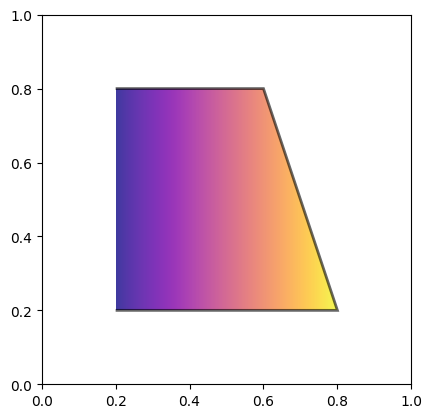

In [ ]:
def hex_boundary(n):
    ks = np.arange(n)
    ks = ks.reshape(1,1,-1)

    n_holder = np.array([[0,1],[1,1],[1,0]]).transpose()
    k_holder = np.array([[1,-1],[-1,0],[0,1]]).transpose()
    n_part =   n*n_holder[:,:,np.newaxis]
    k_part = ks*k_holder[:,:,np.newaxis]
    foo = n_part + k_part
    foo = foo.reshape(2,-1)
    foo = np.concatenate((foo,-foo),axis=1)
    return foo.transpose()

array([[ 0,  1,  1,  0, -1, -1],
       [ 1,  1,  0, -1, -1,  0]])

In [101]:
import numpy as np
n = 2
ks = np.arange(n)
ks = ks.reshape(1,1,-1)

n_holder = np.array([[0,1],[1,1],[1,0]]).transpose()
k_holder = np.array([[1,-1],[-1,0],[0,1]]).transpose()
n_part =   n*n_holder[:,:,np.newaxis]
k_part = ks*k_holder[:,:,np.newaxis]
foo = n_part + k_part
foo = foo.reshape(2,-1)
foo = np.concatenate((foo,-foo),axis=1)
print(foo.shape)
print(foo)

(2, 12)
[[ 0  1  2  1  2  2  0 -1 -2 -1 -2 -2]
 [ 2  1  2  2  0  1 -2 -1 -2 -2  0 -1]]
